In [1]:
import numpy as np
import pandas as pd
import glob

# mencari directory saat ini
import os
os.getcwd()
# Merubah directory
os.chdir('D:\\ITS\\Tugas Akhir\\Source Code')
# Merubah directory (beneran)
os.chdir('D:/ITS/Tugas Akhir/Source Code')
# Path data
cur_path = "D:/ITS/Tugas Akhir/data/Endaq CSV/"

FOLDER = cur_path
totalFiles = 0
totalDir = 0
for base, dirs, files in os.walk(FOLDER):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

print('Total number of files',totalFiles)
print('Total Number of directories',totalDir)

dir_path1 = cur_path+'/normal/'
print('Total Data Normal :',len([entry for entry in os.listdir(dir_path1) if os.path.isfile(os.path.join(dir_path1, entry))]))
dir_path2 = cur_path+'/misalignment/'
print('Total Data Misalignment :',len([entry for entry in os.listdir(dir_path2) if os.path.isfile(os.path.join(dir_path2, entry))]))
dir_path3 = cur_path+'/unbalance'
print('Total Data Unbalance :',len([entry for entry in os.listdir(dir_path3) if os.path.isfile(os.path.join(dir_path3, entry))]))
dir_path4 = cur_path+'/bearing'
print('Total Data Bearing :',len([entry for entry in os.listdir(dir_path4) if os.path.isfile(os.path.join(dir_path4, entry))]))

Searching in :  D:/ITS/Tugas Akhir/data/Endaq CSV/
Searching in :  D:/ITS/Tugas Akhir/data/Endaq CSV/bearing
Searching in :  D:/ITS/Tugas Akhir/data/Endaq CSV/misalignment
Searching in :  D:/ITS/Tugas Akhir/data/Endaq CSV/normal
Searching in :  D:/ITS/Tugas Akhir/data/Endaq CSV/unbalance
Total number of files 4000
Total Number of directories 4
Total Data Normal : 1000
Total Data Misalignment : 1000
Total Data Unbalance : 1000
Total Data Bearing : 1000


In [2]:
normal_file_names = glob.glob(cur_path+'/normal/*.csv')
imnormal_misalignment = glob.glob(cur_path+'/misalignment/*.csv')
imnormal_unbalance = glob.glob(cur_path+'/unbalance/*.csv')
imnormal_bearing = glob.glob(cur_path+'/bearing/*.csv')

In [297]:
# Preprocessing
from sklearn import preprocessing
from numpy.fft import rfft, rfftfreq

def FFT(data):
    data = np.asarray(data)
    #FFT
    n=len(data)
    dt=1/20000 #time increment in each data
    data=rfft(data)*dt
    freq=rfftfreq(n,dt)
    data=abs(data).T
    data = (np.delete(data, range(500*5,len(data)), axis=0)).T # filter frequency (0-500 Hz)
    return (data)

In [4]:
# Feature Extraction
import scipy
from scipy.stats import kurtosis
from scipy.stats import skew

def std(data):
    data = np.asarray(data)
    stdev=pd.DataFrame(np.std(data, axis=1))
    return stdev
def mean(data):
    data = np.asarray(data)
    M=pd.DataFrame(np.mean(data, axis=1))
    return M
def pp(data):
    data = np.asarray(data)
    PP=pd.DataFrame(np.max(data, axis=1) - np.min(data, axis=1))
    return PP
def Variance(data):
    data = np.asarray(data)
    Var=pd.DataFrame(np.var(data, axis=1))
    return Var
def rms(data):
    data = np.asarray(data)
    Rms=pd.DataFrame(np.sqrt(np.mean(data**2, axis=1)))
    return Rms
def Ab_mean(data):
    data = np.asarray(data)
    Abm=pd.DataFrame(np.mean(np.absolute(data),axis=1))
    return Abm
def Shapef(data):
    data = np.asarray(data)
    shapef=pd.DataFrame(rms(data)/Ab_mean(data))
    return shapef
def Impulsef(data):
    data = np.asarray(data)
    impulse=pd.DataFrame(np.max(data)/Ab_mean(data))
    return impulse
def crestf(data):
    data = np.asarray(data)
    crest=pd.DataFrame(np.max(data)/rms(data))
    return crest
def SQRT_AMPL(data):
    data = np.asarray(data)
    SQRTA=pd.DataFrame((np.mean(np.sqrt(np.absolute(data, axis=1))))**2)
    return SQRTA
def clearancef(data):
    data = np.asarray(data)
    clrf=pd.DataFrame(np.max(data, axis=1)/SQRT_AMPL(data))
    return clrf
def kurtosis(data):
    data = pd.DataFrame(data);
    kurt = data.kurt(axis=1);
    return kurt
def skew(data):
    data = pd.DataFrame(data)
    skw = data.skew(axis=1)
    return skw

In [3]:
# Load Data
# def data normal sumbu x
def data_1x(normal_file_names):
    data1x = pd.DataFrame()
    for f1x in normal_file_names:
        df1x = pd.read_csv(f1x, usecols = [1], header=None) # read the csv file
        data1x = pd.concat([data1x,df1x],axis=1,ignore_index=True)
    return data1x
# def data normal sumbu y
def data_1y(normal_file_names):
    data1y = pd.DataFrame()
    for f1y in normal_file_names:
        df1y = pd.read_csv(f1y, usecols = [2], header=None) # read the csv file
        data1y = pd.concat([data1y,df1y],axis=1,ignore_index=True)
    return data1y
# def data normal sumbu z
def data_1z(normal_file_names):
    data1z = pd.DataFrame()
    for f1z in normal_file_names:
        df1z = pd.read_csv(f1z, usecols = [3], header=None) # read the csv file
        data1z = pd.concat([data1z,df1z],axis=1,ignore_index=True)
    return data1z
# def data misalignment sumbu x
def data_2x(imnormal_misalignment):
    data2x = pd.DataFrame()
    for f2x in imnormal_misalignment:
        df2x = pd.read_csv(f2x, usecols = [1], header=None) # read the csv file
        data2x = pd.concat([data2x,df2x],axis=1,ignore_index=True)
    return data2x
# def data misalignment sumbu y
def data_2y(imnormal_misalignment):
    data2y = pd.DataFrame()
    for f2y in imnormal_misalignment:
        df2y = pd.read_csv(f2y, usecols = [2], header=None) # read the csv file
        data2y = pd.concat([data2y,df2y],axis=1,ignore_index=True)
    return data2y
# def data misalignment sumbu z
def data_2z(imnormal_misalignment):
    data2z = pd.DataFrame()
    for f2z in imnormal_misalignment:
        df2z = pd.read_csv(f2z, usecols = [3], header=None) # read the csv file
        data2z = pd.concat([data2z,df2z],axis=1,ignore_index=True)
    return data2z
# def data unbalance sumbu x
def data_3x(imnormal_unbalance):
    data3x = pd.DataFrame()
    for f3x in imnormal_unbalance:
        df3x = pd.read_csv(f3x, usecols = [1], header=None) # read the csv file
        data3x = pd.concat([data3x,df3x],axis=1,ignore_index=True)
    return data3x
# def data unbalance sumbu y
def data_3y(imnormal_unbalance):
    data3y = pd.DataFrame()
    for f3y in imnormal_unbalance:
        df3y = pd.read_csv(f3y, usecols = [2], header=None) # read the csv file
        data3y = pd.concat([data3y,df3y],axis=1,ignore_index=True)
    return data3y
# def data unbalance sumbu z
def data_3z(imnormal_unbalance):
    data3z = pd.DataFrame()
    for f3z in imnormal_unbalance:
        df3z = pd.read_csv(f3z, usecols = [3], header=None) # read the csv file
        data3z = pd.concat([data3z,df3z],axis=1,ignore_index=True)
    return data3z
# def data bearing sumbu x
def data_4x(imnormal_bearing):
    data4x = pd.DataFrame()
    for f4x in imnormal_bearing:
        df4x = pd.read_csv(f4x, usecols = [1], header=None) # read the csv file
        data4x = pd.concat([data4x,df4x],axis=1,ignore_index=True)
    return data4x
# def data bearing sumbu y
def data_4y(imnormal_bearing):
    data4y = pd.DataFrame()
    for f4y in imnormal_bearing:
        df4y = pd.read_csv(f4y, usecols = [2], header=None) # read the csv file
        data4y = pd.concat([data4y,df4y],axis=1,ignore_index=True)
    return data4y
# def data bearing sumbu z
def data_4z(imnormal_bearing):
    data4z = pd.DataFrame()
    for f4z in imnormal_bearing:
        df4z = pd.read_csv(f4z, usecols = [3], header=None) # read the csv file
        data4z = pd.concat([data4z,df4z],axis=1,ignore_index=True)
    return data4z 

In [4]:
# Data normal tiap sumbu x y z
data_normal_x = data_1x(normal_file_names).T
data_normal_y = data_1y(normal_file_names).T
data_normal_z = data_1z(normal_file_names).T

In [5]:
# Data misalignment tiap sumbu x y z
data_misalignment_x = data_2x(imnormal_misalignment).T
data_misalignment_y = data_2y(imnormal_misalignment).T
data_misalignment_z = data_2z(imnormal_misalignment).T

In [6]:
# Data unbalance tiap sumbu x y z
data_unbalance_x = data_3x(imnormal_unbalance).T
data_unbalance_y = data_3y(imnormal_unbalance).T
data_unbalance_z = data_3z(imnormal_unbalance).T

In [7]:
# Data bearing tiap sumbu x y z
data_bearing_x = data_4x(imnormal_bearing).T
data_bearing_y = data_4y(imnormal_bearing).T
data_bearing_z = data_4z(imnormal_bearing).T

In [9]:
from tempfile import TemporaryFile

data_x = np.concatenate((data_normal_x,data_misalignment_x,data_unbalance_x,data_bearing_x))
data_y = np.concatenate((data_normal_y,data_misalignment_y,data_unbalance_y,data_bearing_y))
data_z = np.concatenate((data_normal_z,data_misalignment_z,data_unbalance_z,data_bearing_z))

outfile = TemporaryFile()
np.save(outfile, data_x)

SyntaxError: unmatched ')' (<ipython-input-9-03edb7982a1d>, line 3)

In [ ]:
y = pd.read_csv('D:\ITS\Tugas Akhir\data\DataFrame\Spectral\\label_endaq.csv', header=None)
y = np.array(y)

outfile = TemporaryFile()
np.save(outfile, y)

In [ ]:
# Drop kolom yang tanpa nilai (NAN)
data_normal_x = data_normal_x.dropna(axis=1)
data_normal_y = data_normal_y.dropna(axis=1)
data_normal_z = data_normal_z.dropna(axis=1)

data_misalignment_x = data_misalignment_x.dropna(axis=1)
data_misalignment_y = data_misalignment_y.dropna(axis=1)
data_misalignment_z = data_misalignment_z.dropna(axis=1)

data_unbalance_x = data_unbalance_x.dropna(axis=1)
data_unbalance_y = data_unbalance_y.dropna(axis=1)
data_unbalance_z = data_unbalance_z.dropna(axis=1)

data_bearing_x = data_bearing_x.dropna(axis=1)
data_bearing_y = data_bearing_y.dropna(axis=1)
data_bearing_z = data_bearing_z.dropna(axis=1)
data_bearing_z

In [10]:
# Drop kolom yang tanpa nilai (NAN)
data_normal_x = data_normal_x.dropna(axis=1)
data_normal_y = data_normal_y.dropna(axis=1)
data_normal_z = data_normal_z.dropna(axis=1)

data_misalignment_x = data_misalignment_x.dropna(axis=1)
data_misalignment_y = data_misalignment_y.dropna(axis=1)
data_misalignment_z = data_misalignment_z.dropna(axis=1)

data_unbalance_x = data_unbalance_x.dropna(axis=1)
data_unbalance_y = data_unbalance_y.dropna(axis=1)
data_unbalance_z = data_unbalance_z.dropna(axis=1)

data_bearing_x = data_bearing_x.dropna(axis=1)
data_bearing_y = data_bearing_y.dropna(axis=1)
data_bearing_z = data_bearing_z.dropna(axis=1)
data_bearing_z

,0,1,2,3,4,5,6,7,8,9,...,99818,99819,99820,99821,99822,99823,99824,99825,99826,99827
0,0.533118,0.645810,0.550455,0.429095,0.264392,0.143032,0.004334,-0.073683,-0.117026,-0.264392,...,-0.208087,-0.199417,-0.572240,-1.465280,-2.080871,-1.855444,-0.841019,0.658943,2.037520,2.878539
1,2.202213,1.039103,-0.363472,-1.364089,-2.065377,-2.664037,-2.681141,-1.723285,-0.346368,0.602936,...,-0.436341,-0.034223,0.385007,0.496231,0.359340,0.350784,0.410674,0.539009,0.419230,0.231004
2,2.202213,1.039103,-0.363472,-1.364089,-2.065377,-2.664037,-2.681141,-1.723285,-0.346368,0.602936,...,-0.436341,-0.034223,0.385007,0.496231,0.359340,0.350784,0.410674,0.539009,0.419230,0.231004
3,0.533118,0.645810,0.550455,0.429095,0.264392,0.143032,0.004334,-0.073683,-0.117026,-0.264392,...,-0.208087,-0.199417,-0.572240,-1.465280,-2.080871,-1.855444,-0.841019,0.658943,2.037520,2.878539
4,-2.090995,-1.238615,-0.297445,0.412872,0.927851,1.061035,0.759151,0.332961,-0.190898,-0.794667,...,0.759005,-0.687987,-2.205996,-3.058212,-2.898421,-1.930801,-0.244124,1.442553,2.294769,2.259260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.008588,-0.145999,-0.334940,-0.369293,-0.369293,-0.377881,-0.326352,-0.068706,0.257646,0.455175,...,0.755762,0.455175,0.257646,0.017176,-0.300587,-0.463763,-0.377881,-0.317763,-0.369293,-0.498116
996,-0.536549,-0.373438,-0.321929,-0.201742,-0.047216,0.201742,0.382023,0.485040,0.605227,0.665321,...,-0.270367,-0.313282,-0.364781,-0.193119,0.090122,0.167370,0.030041,-0.141621,-0.236034,-0.313282
997,-0.536549,-0.373438,-0.321929,-0.201742,-0.047216,0.201742,0.382023,0.485040,0.605227,0.665321,...,-0.270367,-0.313282,-0.364781,-0.193119,0.090122,0.167370,0.030041,-0.141621,-0.236034,-0.313282
998,-0.433186,-0.613323,-0.664790,-0.613323,-0.433186,-0.235893,0.064335,0.433186,0.853505,1.059376,...,-0.321673,-0.416030,-0.467498,-0.338829,-0.081490,0.150114,0.321673,0.424608,0.553277,0.613323


In [263]:
# Preprocessing FFT
fft_1x = FFT(data_normal_x)
fft_1y = FFT(data_normal_y)
fft_1z = FFT(data_normal_z)

fft_2x = FFT(data_misalignment_x)
fft_2y = FFT(data_misalignment_y)
fft_2z = FFT(data_misalignment_z)

fft_3x = FFT(data_unbalance_x)
fft_3y = FFT(data_unbalance_y)
fft_3z = FFT(data_unbalance_z)

fft_4x = FFT(data_bearing_x)
fft_4y = FFT(data_bearing_y)
fft_4z = FFT(data_bearing_z)
fft_4y.shape

(1000, 5000)

In [298]:
# merge data
data_merged = np.concatenate((fft_1x,fft_2x,fft_3x,fft_4x,fft_1y,fft_2y,fft_3y,fft_4y,fft_1z,fft_2z,fft_3z,fft_4z))

#normalize data
def NormalizeData(data): # Normalisasi (0-1)
    data_max = np.max(data_merged)
    data_min = np.min(data_merged)
    return (data - np.min(data_min)) / (np.max(data_max) - np.min(data_min))

fft_1x = NormalizeData(fft_1x)
fft_1y = NormalizeData(fft_1y)
fft_1z = NormalizeData(fft_1z)

fft_2x = NormalizeData(fft_2x)
fft_2y = NormalizeData(fft_2y)
fft_2z = NormalizeData(fft_2z)

fft_3x = NormalizeData(fft_3x)
fft_3y = NormalizeData(fft_3y)
fft_3z = NormalizeData(fft_3z)

fft_4x = NormalizeData(fft_4x)
fft_4y = NormalizeData(fft_4y)
fft_4z = NormalizeData(fft_4z)

In [299]:
# Feature Extraction
# shape factor
shapef_1x = Shapef(fft_1x)
shapef_1y = Shapef(fft_1y)
shapef_1z = Shapef(fft_1z)
shapef_2x = Shapef(fft_2x)
shapef_2y = Shapef(fft_2y)
shapef_2z = Shapef(fft_2z)
shapef_3x = Shapef(fft_3x)
shapef_3y = Shapef(fft_3y)
shapef_3z = Shapef(fft_3z)
shapef_4x = Shapef(fft_4x)
shapef_4y = Shapef(fft_4y)
shapef_4z = Shapef(fft_4z)

shapef_1 = pd.concat([shapef_1x,shapef_1y,shapef_1z], axis=1,ignore_index=True)
shapef_2 = pd.concat([shapef_2x,shapef_2y,shapef_2z], axis=1,ignore_index=True)
shapef_3 = pd.concat([shapef_3x,shapef_3y,shapef_3z], axis=1,ignore_index=True)
shapef_4 = pd.concat([shapef_4x,shapef_4y,shapef_4z], axis=1,ignore_index=True)

# root mean square
rms_1x = rms(fft_1x) 
rms_1y = rms(fft_1y)
rms_1z = rms(fft_1z)
rms_2x = rms(fft_2x)
rms_2y = rms(fft_2y)
rms_2z = rms(fft_2z)
rms_3x = rms(fft_3x)
rms_3y = rms(fft_3y)
rms_3z = rms(fft_3z)
rms_4x = rms(fft_4x)
rms_4y = rms(fft_4y)
rms_4z = rms(fft_4z)

rms_1 = pd.concat([rms_1x,rms_1y,rms_1z], axis=1,ignore_index=True)
rms_2 = pd.concat([rms_2x,rms_2y,rms_2z], axis=1,ignore_index=True)
rms_3 = pd.concat([rms_3x,rms_3y,rms_3z], axis=1,ignore_index=True)
rms_4 = pd.concat([rms_4x,rms_4y,rms_4z], axis=1,ignore_index=True)

# impulse factor
Impulsef_1x = Impulsef(fft_1x) 
Impulsef_1y = Impulsef(fft_1y)
Impulsef_1z = Impulsef(fft_1z)
Impulsef_2x = Impulsef(fft_2x)
Impulsef_2y = Impulsef(fft_2y)
Impulsef_2z = Impulsef(fft_2z)
Impulsef_3x = Impulsef(fft_3x)
Impulsef_3y = Impulsef(fft_3y)
Impulsef_3z = Impulsef(fft_3z)
Impulsef_4x = Impulsef(fft_4x)
Impulsef_4y = Impulsef(fft_4y)
Impulsef_4z = Impulsef(fft_4z)

Impulsef_1 = pd.concat([Impulsef_1x,Impulsef_1y,Impulsef_1z], axis=1,ignore_index=True)
Impulsef_2 = pd.concat([Impulsef_2x,Impulsef_2y,Impulsef_2z], axis=1,ignore_index=True)
Impulsef_3 = pd.concat([Impulsef_3x,Impulsef_3y,Impulsef_3z], axis=1,ignore_index=True)
Impulsef_4 = pd.concat([Impulsef_4x,Impulsef_4y,Impulsef_4z], axis=1,ignore_index=True)

#peak factor
pp_1x = pp(fft_1x) 
pp_1y = pp(fft_1y)
pp_1z = pp(fft_1z)
pp_2x = pp(fft_2x)
pp_2y = pp(fft_2y)
pp_2z = pp(fft_2z)
pp_3x = pp(fft_3x)
pp_3y = pp(fft_3y)
pp_3z = pp(fft_3z)
pp_4x = pp(fft_4x)
pp_4y = pp(fft_4y)
pp_4z = pp(fft_4z)

pp_1 = pd.concat([pp_1x,pp_1y,pp_1z], axis=1,ignore_index=True)
pp_2 = pd.concat([pp_2x,pp_2y,pp_2z], axis=1,ignore_index=True)
pp_3 = pd.concat([pp_3x,pp_3y,pp_3z], axis=1,ignore_index=True)
pp_4 = pd.concat([pp_4x,pp_4y,pp_4z], axis=1,ignore_index=True)

#kurtosis factor
kurtosis_1x = kurtosis(fft_1x) 
kurtosis_1y = kurtosis(fft_1y)
kurtosis_1z = kurtosis(fft_1z)
kurtosis_2x = kurtosis(fft_2x)
kurtosis_2y = kurtosis(fft_2y)
kurtosis_2z = kurtosis(fft_2z)
kurtosis_3x = kurtosis(fft_3x)
kurtosis_3y = kurtosis(fft_3y)
kurtosis_3z = kurtosis(fft_3z)
kurtosis_4x = kurtosis(fft_4x)
kurtosis_4y = kurtosis(fft_4y)
kurtosis_4z = kurtosis(fft_4z)

kurtosis_1 = pd.concat([kurtosis_1x,kurtosis_1y,kurtosis_1z], axis=1,ignore_index=True)
kurtosis_2 = pd.concat([kurtosis_2x,kurtosis_2y,kurtosis_2z], axis=1,ignore_index=True)
kurtosis_3 = pd.concat([kurtosis_3x,kurtosis_3y,kurtosis_3z], axis=1,ignore_index=True)
kurtosis_4 = pd.concat([kurtosis_4x,kurtosis_4y,kurtosis_4z], axis=1,ignore_index=True)

#crest factor
crestf_1x = crestf(fft_1x) 
crestf_1y = crestf(fft_1y)
crestf_1z = crestf(fft_1z)
crestf_2x = crestf(fft_2x)
crestf_2y = crestf(fft_2y)
crestf_2z = crestf(fft_2z)
crestf_3x = crestf(fft_3x)
crestf_3y = crestf(fft_3y)
crestf_3z = crestf(fft_3z)
crestf_4x = crestf(fft_4x)
crestf_4y = crestf(fft_4y)
crestf_4z = crestf(fft_4z)

crestf_1 = pd.concat([crestf_1x,crestf_1y,crestf_1z], axis=1,ignore_index=True)
crestf_2 = pd.concat([crestf_2x,crestf_2y,crestf_2z], axis=1,ignore_index=True)
crestf_3 = pd.concat([crestf_3x,crestf_3y,crestf_3z], axis=1,ignore_index=True)
crestf_4 = pd.concat([crestf_4x,crestf_4y,crestf_4z], axis=1,ignore_index=True)

In [300]:
# mean
mean_1x = mean(fft_1x)
mean_1y = mean(fft_1y)
mean_1z = mean(fft_1z)
mean_2x = mean(fft_2x)
mean_2y = mean(fft_2y)
mean_2z = mean(fft_2z)
mean_3x = mean(fft_3x)
mean_3y = mean(fft_3y)
mean_3z = mean(fft_3z)
mean_4x = mean(fft_4x)
mean_4y = mean(fft_4y)
mean_4z = mean(fft_4z)

mean_1 = pd.concat([mean_1x,mean_1y,mean_1z], axis=1,ignore_index=True)
mean_2 = pd.concat([mean_2x,mean_2y,mean_2z], axis=1,ignore_index=True)
mean_3 = pd.concat([mean_3x,mean_3y,mean_3z], axis=1,ignore_index=True)
mean_4 = pd.concat([mean_4x,mean_4y,mean_4z], axis=1,ignore_index=True)

# std
std_1x = std(fft_1x)
std_1y = std(fft_1y)
std_1z = std(fft_1z)
std_2x = std(fft_2x)
std_2y = std(fft_2y)
std_2z = std(fft_2z)
std_3x = std(fft_3x)
std_3y = std(fft_3y)
std_3z = std(fft_3z)
std_4x = std(fft_4x)
std_4y = std(fft_4y)
std_4z = std(fft_4z)

std_1 = pd.concat([std_1x,std_1y,std_1z], axis=1,ignore_index=True)
std_2 = pd.concat([std_2x,std_2y,std_2z], axis=1,ignore_index=True)
std_3 = pd.concat([std_3x,std_3y,std_3z], axis=1,ignore_index=True)
std_4 = pd.concat([std_4x,std_4y,std_4z], axis=1,ignore_index=True)

#skew
skew_1x = skew(fft_1x) 
skew_1y = skew(fft_1y)
skew_1z = skew(fft_1z)
skew_2x = skew(fft_2x)
skew_2y = skew(fft_2y)
skew_2z = skew(fft_2z)
skew_3x = skew(fft_3x)
skew_3y = skew(fft_3y)
skew_3z = skew(fft_3z)
skew_4x = skew(fft_4x)
skew_4y = skew(fft_4y)
skew_4z = skew(fft_4z)

skew_1 = pd.concat([skew_1x,skew_1y,skew_1z], axis=1,ignore_index=True)
skew_2 = pd.concat([skew_2x,skew_2y,skew_2z], axis=1,ignore_index=True)
skew_3 = pd.concat([skew_3x,skew_3y,skew_3z], axis=1,ignore_index=True)
skew_4 = pd.concat([skew_4x,skew_4y,skew_4z], axis=1,ignore_index=True)

In [301]:
x_1 = pd.concat([mean_1,std_1,shapef_1,rms_1,Impulsef_1,pp_1,kurtosis_1,crestf_1,skew_1], axis=1,ignore_index=True)
x_2 = pd.concat([mean_2,std_1,shapef_2,rms_2,Impulsef_2,pp_2,kurtosis_2,crestf_2,skew_2], axis=1,ignore_index=True)
x_3 = pd.concat([mean_3,std_1,shapef_3,rms_3,Impulsef_3,pp_3,kurtosis_3,crestf_3,skew_3], axis=1,ignore_index=True)
x_4 = pd.concat([mean_4,std_1,shapef_4,rms_4,Impulsef_4,pp_4,kurtosis_4,crestf_4,skew_4], axis=1,ignore_index=True)
x = pd.concat([x_1,x_2,x_3,x_4], axis=0,ignore_index=True)
x = np.asarray(x)
x.shape

# simpan data hasil ekstraksi fitur fft
fft_x = (pd.DataFrame(x)).to_csv (r'D:\ITS\Tugas Akhir\data\DataFrame\Spectral\fft_endaq.csv', index = None, header=False) 

In [302]:
# Membuat label

y_1 = np.full((int(len(x_1)),1),0)
y_2 = np.full((int(len(x_2)),1),1)
y_3 = np.full((int(len(x_3)),1),2)
y_4 = np.full((int(len(x_4)),1),3)
y = np.concatenate((y_1,y_2,y_3,y_4), axis=None)
#y = pd.DataFrame(y)
y.shape

# simpan label
y_label = (pd.DataFrame(y)).to_csv (r'D:\ITS\Tugas Akhir\data\DataFrame\Spectral\label_endaq.csv', index = None, header=False) 

In [36]:
import numpy as np
import pandas as pd

# load data hasil ekstraksi fitur fft
x = pd.read_csv('D:\ITS\Tugas Akhir\data\DataFrame\Spectral\\fft_endaq.csv', header=None)

# load label
y = pd.read_csv('D:\ITS\Tugas Akhir\data\DataFrame\Spectral\\label_endaq.csv', header=None)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [38]:
print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Train Data : (3200, 27)
Shape of Test Data : (800, 27)


C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vect

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vect

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vect

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vect

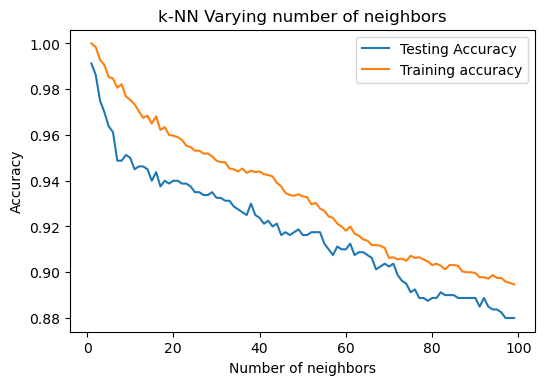

In [148]:
## kNN Machine Learning
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,100)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    knn.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
#Generate plot
import matplotlib.pyplot as plt
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y 

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y 

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y 

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y 

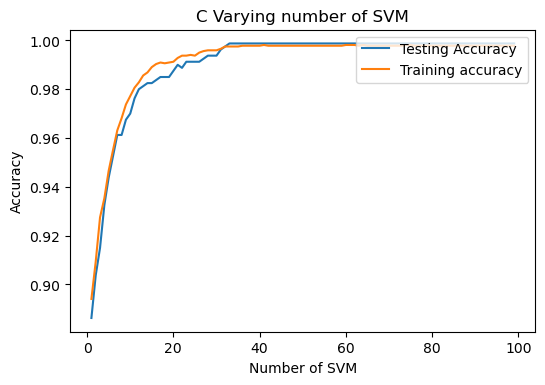

In [149]:
## SVM Machine Learning
from sklearn.svm import SVC
#Setup arrays to store training and test accuracies
c_svm = np.arange(1,100)
train_accuracy =np.empty(len(c_svm))
test_accuracy = np.empty(len(c_svm))
for i,k in enumerate(c_svm):
    #Setup a knn classifier with c_svm
    svm = SVC(C=k)
    #Fit the model
    svm.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = svm.score(X_train, y_train)
    #Compute accuracy on the test set
    test_accuracy[i] = svm.score(X_test, y_test) 
#Generate plot
import matplotlib.pyplot as plt
plt.title('C Varying number of SVM')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of SVM')
plt.ylabel('Accuracy')
plt.show()

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1) #n_neighbors = k
outknn = knn.fit(X_train,y_train)
print("k={}NN Accuracy on Train Data: {}".format(1,knn.score(X_train,y_train)))
print("k={}NN Accuracy on Test Data: {}".format(1,knn.score(X_test,y_test)))

## SVM Machine Learning
from sklearn.svm import SVC
svm = SVC(C=50, kernel='rbf', class_weight='balanced', random_state = None)
clf = svm.fit(X_train,y_train)
print("SVM accuracy is {} on Train Dataset".format(svm.score(X_train,y_train)))
print("SVM accuracy is {} on Test Dataset".format(svm.score(X_test,y_test)))

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

model= GaussianNB(var_smoothing=1e-20)
gnb = model.fit(X_train,y_train)
gnb_pred=model.predict(X_test)

print("NB accuracy is {} on Train Dataset".format(model.score(X_train,y_train)))
print("NB accuracy is {} on Test Dataset".format(model.score(X_test,y_test)))

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k=1NN Accuracy on Train Data: 1.0
k=1NN Accuracy on Test Data: 0.99625


C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM accuracy is 0.9953125 on Train Dataset
SVM accuracy is 0.99625 on Test Dataset
NB accuracy is 0.993125 on Train Dataset
NB accuracy is 0.99625 on Test Dataset


C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


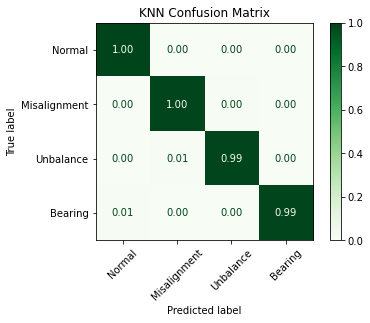

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


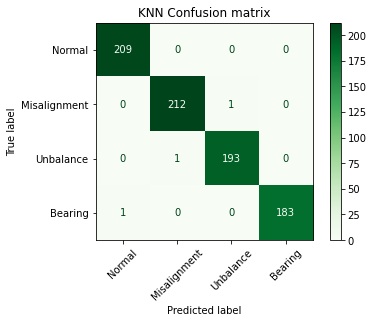

In [8]:
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

# Generate confusion matrix (normalization)
class_names = ['Normal', 'Misalignment', 'Unbalance', 'Bearing']
matrix_1 = plot_confusion_matrix(outknn, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,values_format='.2f',
                                 normalize='true')
plt.title('KNN Confusion Matrix')
plt.show(matrix_1)

matrix_2 = plot_confusion_matrix(outknn, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,
                                 normalize=None)
plt.title('KNN Confusion matrix')
plt.show(matrix_2)

plt.show()

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


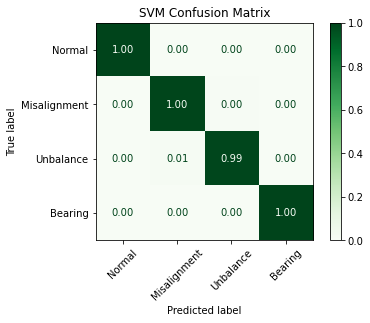

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


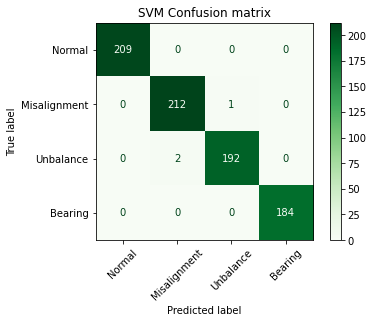

In [9]:
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

# Generate confusion matrix (normalization)
class_names = ['Normal', 'Misalignment', 'Unbalance', 'Bearing']
matrix_1 = plot_confusion_matrix(clf, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,values_format='.2f',
                                 normalize='true')
plt.title('SVM Confusion Matrix')
plt.show(matrix_1)

matrix_2 = plot_confusion_matrix(clf, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,
                                 normalize=None)
plt.title('SVM Confusion matrix')
plt.show(matrix_2)

plt.show()

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


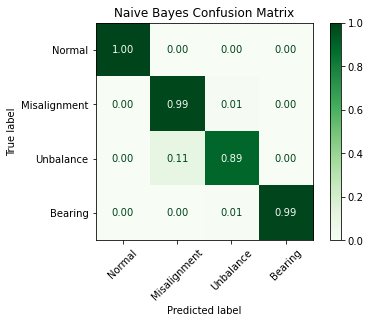

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


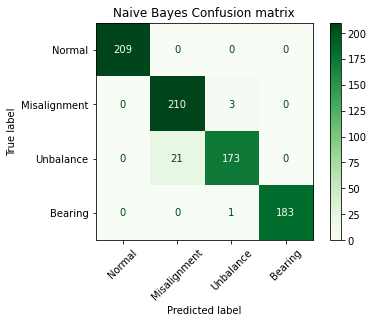

In [10]:
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

# Generate confusion matrix (normalization)
class_names = ['Normal', 'Misalignment', 'Unbalance', 'Bearing']
matrix_1 = plot_confusion_matrix(gnb, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,values_format='.2f',
                                 normalize='true')
plt.title('Naive Bayes Confusion Matrix')
plt.show(matrix_1)

matrix_2 = plot_confusion_matrix(gnb, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,
                                 normalize=None)
plt.title('Naive Bayes Confusion matrix')
plt.show(matrix_2)

plt.show()

In [40]:
import pickle
# save the model to disk
# 'wb' : The w means that you'll be writing to the file, and b refers to binary mode.
pickle.dump(outknn, open('knn_model_fft_080622_10.sav', 'wb'))
pickle.dump(clf, open('svm_model_fft_080622_10.sav', 'wb'))
pickle.dump(gnb, open('gnb_model_fft_080622_10.sav', 'wb'))

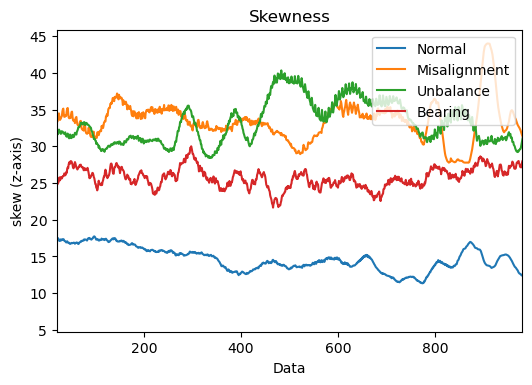

In [309]:
from numpy import linspace, loadtxt, ones, convolve
# Plot Scatter
# Scatterplot - Color Change
y1 = skew_1z
y2 = skew_2z
y3 = skew_3z
y4 = skew_4z

y1 = y1.values.flatten()
y2 = y2.values.flatten()
y3 = y3.values.flatten()
y4 = y4.values.flatten()

x = np.arange(0,len(y1),1)

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

y11 = movingaverage(y1, 30)
y22 = movingaverage(y2, 30)
y33 = movingaverage(y3, 30)
y44 = movingaverage(y4, 30)

#y = plt.scatter(x,y1,s=5,color='cyan',label ='Normal')
y11 = plt.plot(x,y11,label='Normal')
y22 = plt.plot(x,y22,label='Misalignment')
y33 = plt.plot(x,y33,label='Unbalance')
y44 = plt.plot(x,y44,label='Bearing')

#y = plt.scatter(x,y2,s=5,color= 'navy',label ='Misalignment')
#y = plt.scatter(x,y3,s=5,color= 'darkgreen',label ='Unbalance')
#y = plt.scatter(x,y4,s=5,color= 'lawngreen',label ='Bearing')

y = plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':100, 'legend.loc':'upper right'})

# Decorate
y = plt.title('Skewness')
y = plt.xlabel('Data')
y = plt.ylabel('skew (z-axis)')
y = plt.legend()
#y = plt.ylim(0,2)
y = plt.xlim(20,980)
y = plt.show()